In [1]:
import numpy as np
np.random.seed(314159)

import matplotlib.pyplot as plt

## Loading qSVM data

In [2]:
s4_tm = np.load('results/synth-4_qSVM_top_models.npy')
s4_auc = np.load('results/synth-4_qSVM_top_auroc.npy')
s4_acc = np.load('results/synth-4_qSVM_top_accuracy.npy')

In [3]:
s3_tm = np.load('results/synth-3_qSVM_top_models.npy')
s3_auc = np.load('results/synth-3_qSVM_top_auroc.npy')
s3_acc = np.load('results/synth-3_qSVM_top_accuracy.npy')

In [4]:
s2_tm = np.load('results/synth-2_qSVM_top_models.npy')
s2_auc = np.load('results/synth-2_qSVM_top_auroc.npy')
s2_acc = np.load('results/synth-2_qSVM_top_accuracy.npy')

In [5]:
s2_qsvm_auc = s2_auc[:, 0]
s2_qsvm_acc = s2_acc[:, 0]

s3_qsvm_auc = s3_auc[:, 0]
s3_qsvm_acc = s3_acc[:, 0]

s4_qsvm_auc = s4_auc[:, 0]
s4_qsvm_acc = s4_acc[:, 0]

aucs = np.vstack((s2_qsvm_auc, s3_qsvm_auc, s4_qsvm_auc)).T
accs = np.vstack((s2_qsvm_acc, s3_qsvm_acc, s4_qsvm_acc)).T


In [6]:
print("top qsvm models")
print("synth-2, ", s2_tm[0])
print("synth-3, ", s3_tm[0])
print("synth-4, ", s4_tm[0])

top qsvm models
synth-2,  [2 3 1 4]
synth-3,  [2 4 5 1]
synth-4,  [2 2 1 4]


## Loading cSVM data

In [7]:
s2_csvm_tm = np.load('results/synth-2_cSVM_top_models.npy')
s2_csvm_auc = np.load('results/synth-2_cSVM_top_auroc.npy')
s2_csvm_acc = np.load('results/synth-2_cSVM_top_accuracy.npy')

In [8]:
s3_csvm_tm = np.load('results/synth-3_cSVM_top_models.npy')
s3_csvm_auc = np.load('results/synth-3_cSVM_top_auroc.npy')
s3_csvm_acc = np.load('results/synth-3_cSVM_top_accuracy.npy')

In [9]:
s4_csvm_tm = np.load('results/synth-4_cSVM_top_models.npy')
s4_csvm_auc = np.load('results/synth-4_cSVM_top_auroc.npy')
s4_csvm_acc = np.load('results/synth-4_cSVM_top_accuracy.npy')

In [10]:
s2_c_auc = s2_csvm_auc[0]
s2_c_acc = s2_csvm_auc[0]

s3_c_acc = s3_csvm_auc[0]
s3_c_auc = s3_csvm_auc[0]

s4_c_auc = s4_csvm_auc[0]
s4_c_acc = s4_csvm_auc[0]

csvm_aucs = np.vstack((s2_c_auc, s3_c_auc, s4_c_auc))
csvm_accs = np.vstack((s2_c_acc, s3_c_acc, s4_c_acc))

In [11]:
print('csvm top models')
print('synth-2', s2_csvm_tm[0], s2_c_auc)
print('synth-3', s3_csvm_tm[0], s3_c_auc)
print('synth-4', s4_csvm_tm[0], s4_c_auc)

csvm top models
synth-2 [1.  0.5] 0.9953703703703703
synth-3 [1.  0.5] 0.9807098765432098
synth-4 [2 2] 0.7330246913580248


## Figures

In [12]:
boxprops = dict(linewidth=0.4, color='black')
flierprops = dict(marker='.', markerfacecolor='lightblue', markersize=8, markeredgewidth = 0.4,
                  markeredgecolor='black')
whiskerprops = dict(linewidth=1)

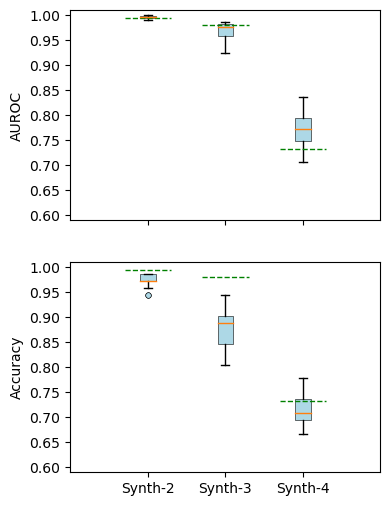

In [13]:
fig, ax = plt.subplots(2, 1,figsize = (4, 6))

#Plotting boxplot
bplt = ax[0].boxplot(aucs, positions = [0.5, 1, 1.5], widths = [0.1] * 3, boxprops=boxprops, flierprops=flierprops, whiskerprops=whiskerprops, patch_artist=True)

#Prettifying boxplot
for patch in bplt['boxes']:
    patch.set_facecolor('lightblue')

#Setting axis tick labels
ax[0].set_xticks([0.5, 1, 1.5], [])
ax[0].set_ylabel('AUROC')

ax[0].set_ylim(0.59, 1.01)
ax[0].set_yticks(np.arange(0.6, 1.05, 0.05), ['{:.2f}'.format(t) for t in np.arange(0.6, 1.05, 0.05)])

#Adding csvm results
ax[0].plot([0.35, 0.65], [csvm_aucs[0], csvm_aucs[0]], 
           color = 'green', 
           linestyle='--',
           linewidth=1)

ax[0].plot([0.85, 1.15], [csvm_aucs[1], csvm_aucs[1]], 
           color = 'green', 
           linestyle='--',
           linewidth=1)

ax[0].plot([1.35, 1.65], [csvm_aucs[2], csvm_aucs[2]], 
           color = 'green', 
           linestyle='--',
           linewidth=1)

########
#AXIS 1#
########

#Plotting boxplot
bplt = ax[1].boxplot(accs, positions = [0.5, 1, 1.5], widths = [0.1] * 3, boxprops=boxprops, flierprops=flierprops, whiskerprops=whiskerprops, patch_artist=True)

#Prettifying boxplot
for patch in bplt['boxes']:
    patch.set_facecolor('lightblue')

#Setting axis tick labels
ax[1].set_xticks([0.5, 1, 1.5], ['Synth-2', 'Synth-3', 'Synth-4'])
ax[1].set_ylabel('Accuracy')

ax[1].set_ylim(0.59, 1.01)
ax[1].set_yticks(np.arange(0.6, 1.05, 0.05), ['{:.2f}'.format(t) for t in np.arange(0.6, 1.05, 0.05)])

#Adding csvm results
ax[1].plot([0.35, 0.65], [csvm_accs[0], csvm_accs[0]], 
           color = 'green', 
           linestyle='--',
           linewidth=1)

ax[1].plot([0.85, 1.15], [csvm_accs[1], csvm_accs[1]], 
           color = 'green', 
           linestyle='--',
           linewidth=1)

ax[1].plot([1.35, 1.65], [csvm_accs[2], csvm_accs[2]], 
           color = 'green', 
           linestyle='--',
           linewidth=1)

plt.show()

## Synth data example figure

In [14]:
from plot_boundary import plot
from classifiers import SoftMarginKernelClassifier, QUBOSoftMarginClassifier
from kernel_SVM_functions import rbf_kernel

In [15]:
#Training each model on the full dataset

#best csvm params for synth 3 and 4 respectively: (C, gamma) (1, 1) (1, 2)
#Best qSVM params for 3 and 4 respectively: (2, 3, 5, 2), (2, 2, 1, 4)

synth_2 = np.loadtxt('synth_data/synth_0.2.csv', delimiter=',')
X_s2 = synth_2[:, :-1]
t_s2 = synth_2[:, -1].reshape(-1, 1)

cSVM_s2 = SoftMarginKernelClassifier(1, rbf_kernel, 1)
cSVM_s2 = cSVM_s2.fit(X_s2, t_s2)

qSVM_s2 = QUBOSoftMarginClassifier(2, 3, 1, rbf_kernel, 4)
qSVM_s2 = qSVM_s2.make_QUBO_problem(X_s2, t_s2).fit(X_s2, t_s2)

In [16]:
synth_4 = np.loadtxt('synth_data/synth_0.4.csv', delimiter=',')
X_s4 = synth_4[:, :-1]
t_s4 = synth_4[:, -1].reshape(-1, 1)

cSVM_s4 = SoftMarginKernelClassifier(1, rbf_kernel, 1)
cSVM_s4 = cSVM_s4.fit(X_s4, t_s4)

qSVM_s4 = QUBOSoftMarginClassifier(2, 3, 5, rbf_kernel, 2)
qSVM_s4 = qSVM_s4.make_QUBO_problem(X_s4, t_s4).fit(X_s4, t_s4)

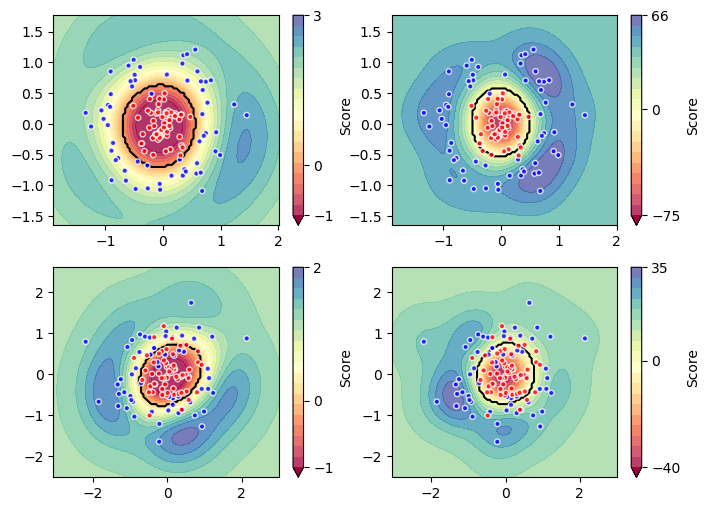

In [17]:
fig, ax = plt.subplots(2, 2, figsize = (8, 6))

#Plot for Synth3 cSVM
plot(X_s2, t_s2, cSVM_s2, 'decision_function', colorbar = True, fig=fig, ax=ax[0, 0])

#Plot for Synth3 qSVM
plot(X_s2, t_s2, qSVM_s2, 'decision_function', colorbar = True, fig=fig, ax=ax[0, 1])

#Plot for Synth4 cSVM
plot(X_s4, t_s4, cSVM_s4, 'decision_function', colorbar = True, fig=fig, ax=ax[1, 0])

#Plot for Synth4 qSVM
plot(X_s4, t_s4, qSVM_s4, 'decision_function', colorbar = True, fig=fig, ax=ax[1, 1])

plt.show()
